# Communicate Data Findings
## by Pranav Singla

## Preliminary Wrangling

This project is divided into two major parts >

In the first part, we will conduct an exploratory data analysis on a dataset of your choosing. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results. 

## Data Gathering

Original dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# display information about the original dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Since our main goal here is EDA , I merged assessing and cleaning steps into one to make it concise and I left the following code here by choice for future references and more understanding of the original and cleaned datasets.

## Data Assessing and Cleaning

1. choose subset of features important 
2. drop duplicated rows based on listing number 
3. convert datatypes of TotalTrades and TotalInquiries to int , ListingCreationDate to datetime
4. removed rows without ProsperRating
5. fill in missing values of occupation and DebtToIncomeRatio
6. change listing category numeric to string.

In [4]:
# Subset the dataframe by selecting features of interest
cols = ['ListingNumber','ListingCreationDate','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
df_loan = loan[cols]

In [5]:
# display information about the subdataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanOriginalAmount         113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   BorrowerAPR                113912 non-null  float64
 7   BorrowerRate               113937 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  Occupation                 110349 non-null  object 
 11  Term                       113937 non-null  int64  
 12  EmploymentStatus           111682 non-null  object 
 13  TotalInquiries             11

In [6]:
# display random rows to get better understanding of the dataset and errors present
df_loan.sample(10)

,ListingNumber,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
57127,255013,2007-12-23 18:05:45.440000000,3500,Completed,7,CT,0.13625,0.1150,7083.333333,NaN,Professional,36,Full-time,1.0,0.16,115.42,25.0,206
35266,652811,2012-10-12 07:15:14.193000000,4000,Current,6,TX,0.33286,0.2932,7229.416667,E,Other,36,Employed,4.0,0.21,168.32,35.0,32
36132,477401,2010-09-28 04:09:35.910000000,1000,Completed,7,FL,0.16116,0.1065,3000.000000,B,Other,36,Retired,5.0,NaN,32.57,26.0,78
78752,518840,2011-07-28 08:39:55.153000000,4000,Chargedoff,1,MN,0.34621,0.3099,0.000000,E,Other,36,Not employed,1.0,NaN,171.98,7.0,10
42258,481953,2010-10-28 13:34:06.523000000,2500,Chargedoff,6,IL,0.38723,0.3500,4050.000000,HR,Clerical,36,Full-time,3.0,0.27,113.09,30.0,20
100293,1121815,2014-01-20 17:57:18.990000000,6100,Current,1,MA,0.18990,0.1535,4000.000000,B,Executive,36,Employed,1.0,0.09,212.51,25.0,18
28230,383794,2008-08-16 15:49:28.620000000,1000,Chargedoff,7,KY,0.36387,0.3395,3083.333333,NaN,Civil Service,36,Full-time,16.0,0.30,44.64,26.0,16
51992,552079,2012-01-17 11:59:56.660000000,12000,Completed,1,CT,0.20358,0.1845,5916.666667,B,Retail Management,60,Employed,4.0,0.12,307.67,30.0,82
111921,400117,2008-09-17 19:06:42.587000000,1600,Chargedoff,3,CA,0.31191,0.2883,2500.000000,NaN,Other,36,Full-time,3.0,NaN,66.90,17.0,46
21942,1024450,2013-12-02 14:52:01.873000000,20000,Current,1,TX,0.09434,0.0809,5833.333333,AA,Nurse (RN),36,Employed,2.0,0.28,627.56,22.0,167


In [7]:
# drop duplicates in the dataset
df_loan = df_loan.drop_duplicates()

In [8]:
# selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset 
# and filling in missing values is not possible.
df_loan = df_loan[df_loan['ProsperRating (Alpha)'].notnull()]

In [9]:
# filling missing values for the Occupation as unknown
df_loan.Occupation = df_loan.Occupation.fillna('Unknown')

In [10]:
# filling in missing values of DebtToIncomeRatio as mean of the column
df_loan.DebtToIncomeRatio = df_loan.DebtToIncomeRatio.fillna(df_loan.DebtToIncomeRatio.mean())

In [11]:
# converting datatypes of the required columns
df_loan.TotalInquiries = df_loan.TotalInquiries.astype(int)
df_loan.TotalTrades = df_loan.TotalTrades.astype(int)

In [12]:
# Splitting ListingCreationDate column into year,month,day,time
df_loan['year']=df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
df_loan['month'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [13]:
# unique values of month
df_loan.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

In [14]:
# replacing numerical values of month with names
df_loan.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [15]:
# unique values of month
df_loan.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [16]:
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [17]:
df_loan['day'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
df_loan['time'] = df_loan['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [18]:
# drop the original ListingCreationDate column
df_loan.drop(columns = ['ListingCreationDate'],inplace = True)

## Exploratory Data Analysis

In [19]:
# display information about the cleaned dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              83982 non-null  int64  
 1   LoanOriginalAmount         83982 non-null  int64  
 2   LoanStatus                 83982 non-null  object 
 3   ListingCategory (numeric)  83982 non-null  int64  
 4   BorrowerState              83982 non-null  object 
 5   BorrowerAPR                83982 non-null  float64
 6   BorrowerRate               83982 non-null  float64
 7   StatedMonthlyIncome        83982 non-null  float64
 8   ProsperRating (Alpha)      83982 non-null  object 
 9   Occupation                 83982 non-null  object 
 10  Term                       83982 non-null  int64  
 11  EmploymentStatus           83982 non-null  object 
 12  TotalInquiries             83982 non-null  int64  
 13  DebtToIncomeRatio          83982 non-null  fl

In [20]:
# descriptive statistics for numeric variables
df_loan.describe()

,ListingNumber,LoanOriginalAmount,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


### What is the structure of your dataset?

The dataset contains 83982 loans with 21 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus and many others)

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan and how employment status and debtToIncome ratio associates with various metrics in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.
Employment status and occupation will affect out ProsperRating and loan Amount.

## Univariate Exploration

In [21]:
# month into ordered categorical types
rate_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['month'] = df_loan['month'].astype(ordered_var)
df_loan.groupby('month')['ListingNumber'].count()

month
Jan     9036
Feb     7887
Mar     5376
Apr     4906
May     5469
Jun     5805
Jul     6630
Aug     6401
Sept    7480
Oct     8586
Nov     8122
Dec     8284
Name: ListingNumber, dtype: int64

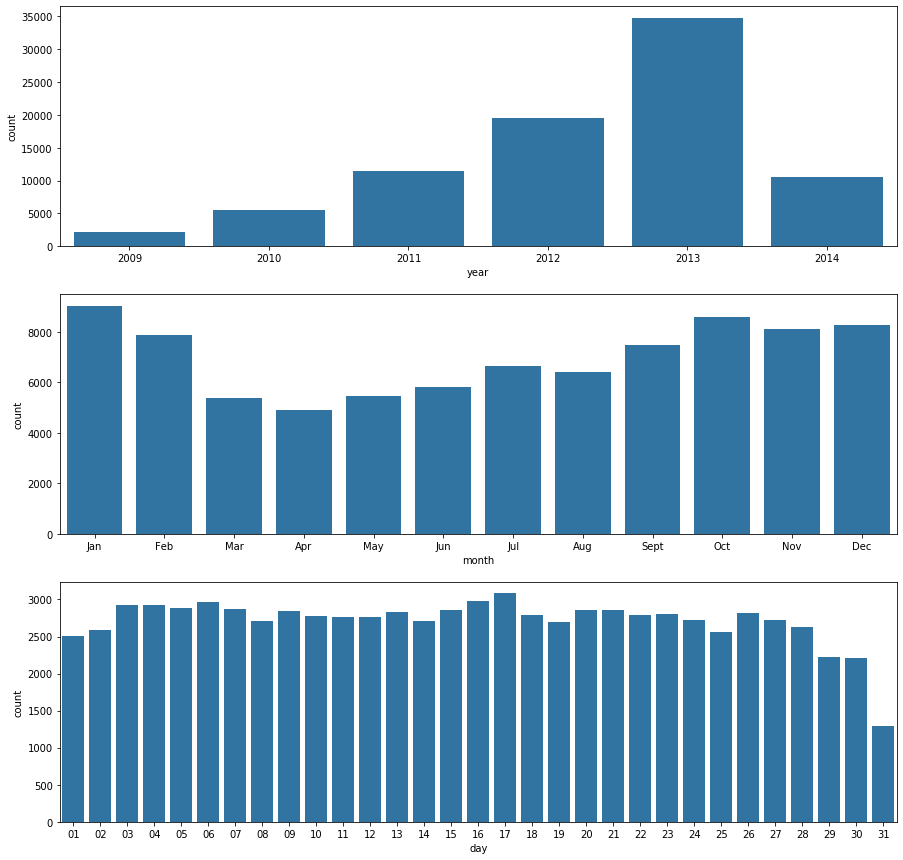

In [22]:
# countplots of loans listed year, month and day of the month wise
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'year', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'month', color = default_color, ax = ax[1])
sb.countplot(data = df_loan, x = 'day', color = default_color, ax = ax[2])

I'll start by looking at the distribution of the main variable of interest: borrower APR.

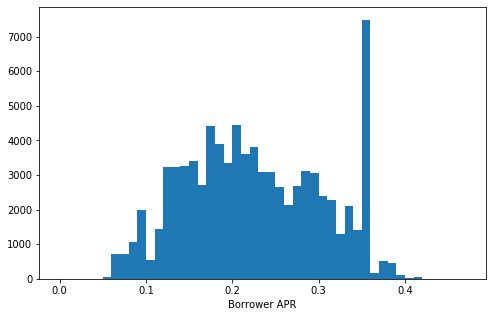

In [23]:
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.  

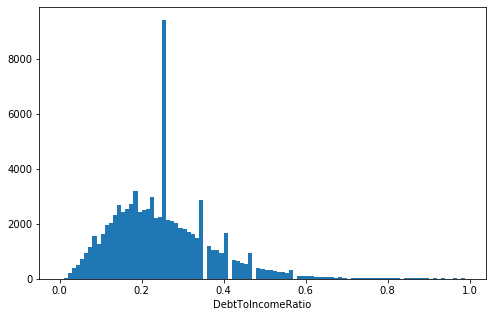

In [24]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

Distribution has unimodal peak around 0.2 with unusual peak around 0.25 which indicates most people prefer 1:4 ratio of debt to Income which is a good thing.

Next up, look at the distribution of the first predictor variable of interest: LoanOriginalAmount	

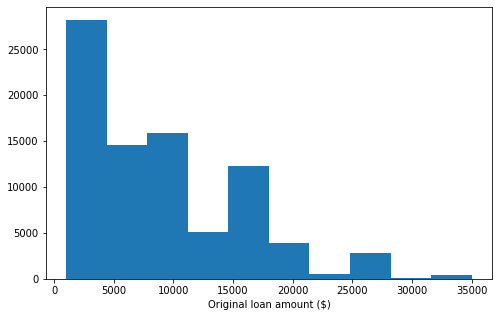

In [25]:
plt.figure(figsize=[8, 5])
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');

The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. . It means that most of the loans are multiples of 5k.

Now, look at the distributions of other variables of interest:
stated monthly income

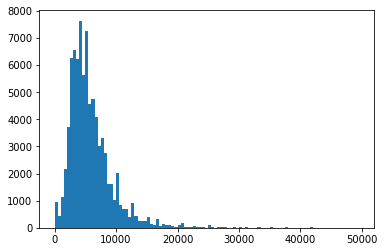

In [26]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins=bins_smi);

The distribution of stated monthly income is severely right screwed, with stated monthly income less than 30k. and peak around 6K. There are some outliers around 100K and 50K which should be removed

In [27]:
df_loan = df_loan[df_loan.StatedMonthlyIncome<30000]

Look at distributions of Occupation, Prosper rating and employment status

In [28]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype(ordered_var)

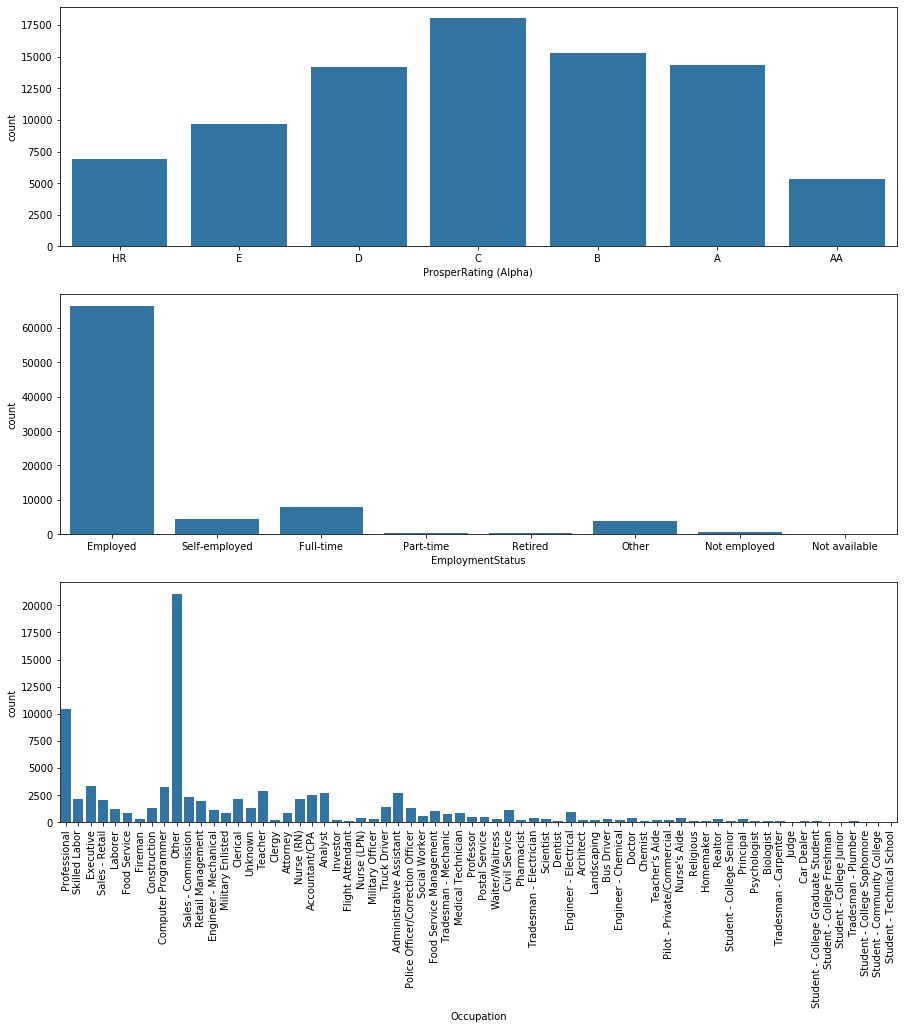

In [29]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[0])
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
sb.countplot(data = df_loan, x = 'Occupation', color = default_color, ax = ax[2]);
plt.xticks(rotation=90);

The least of the borrowers are students. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.  

### Were there any unusual points? Did you need to perform any transformations?

The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. DebtToIncomeRatio is also right skewed.
There is no need to perform any transformations.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [30]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio']
cat_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus','Occupation']

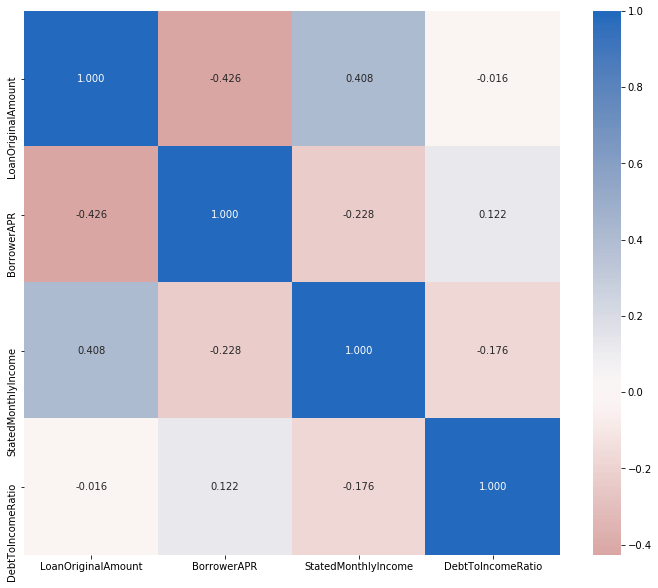

In [31]:
# correlation plot
plt.figure(figsize = [12, 10])
sb.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

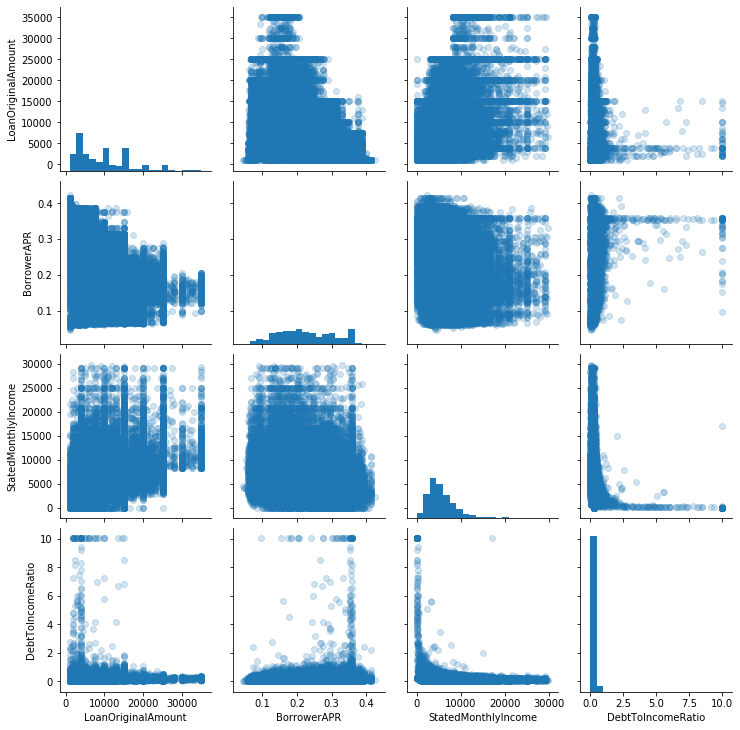

In [32]:
g = sb.PairGrid(data = df_loan, vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

Let's move on to looking at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

<Figure size 1440x1440 with 0 Axes>

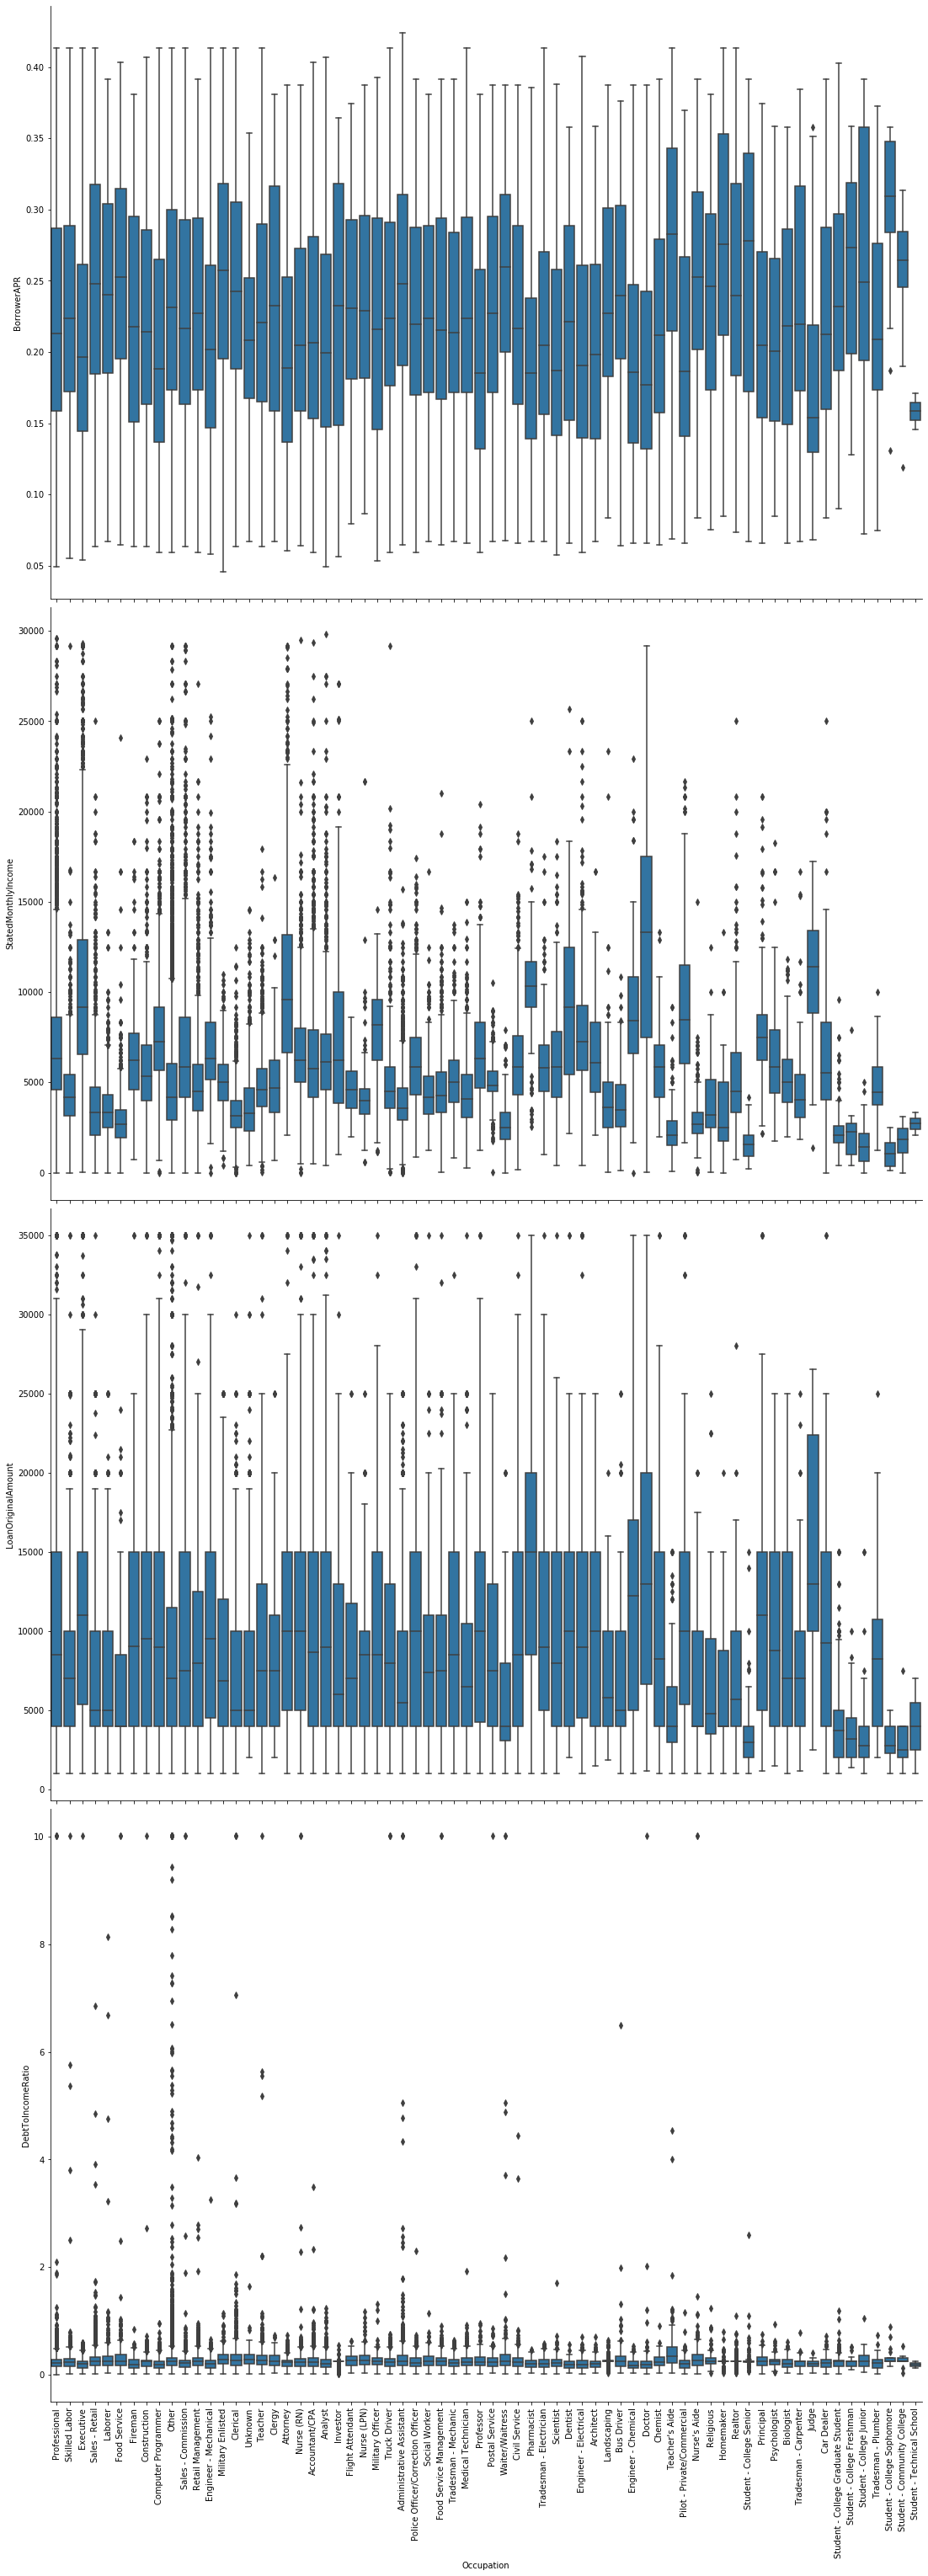

In [33]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

<Figure size 720x720 with 0 Axes>

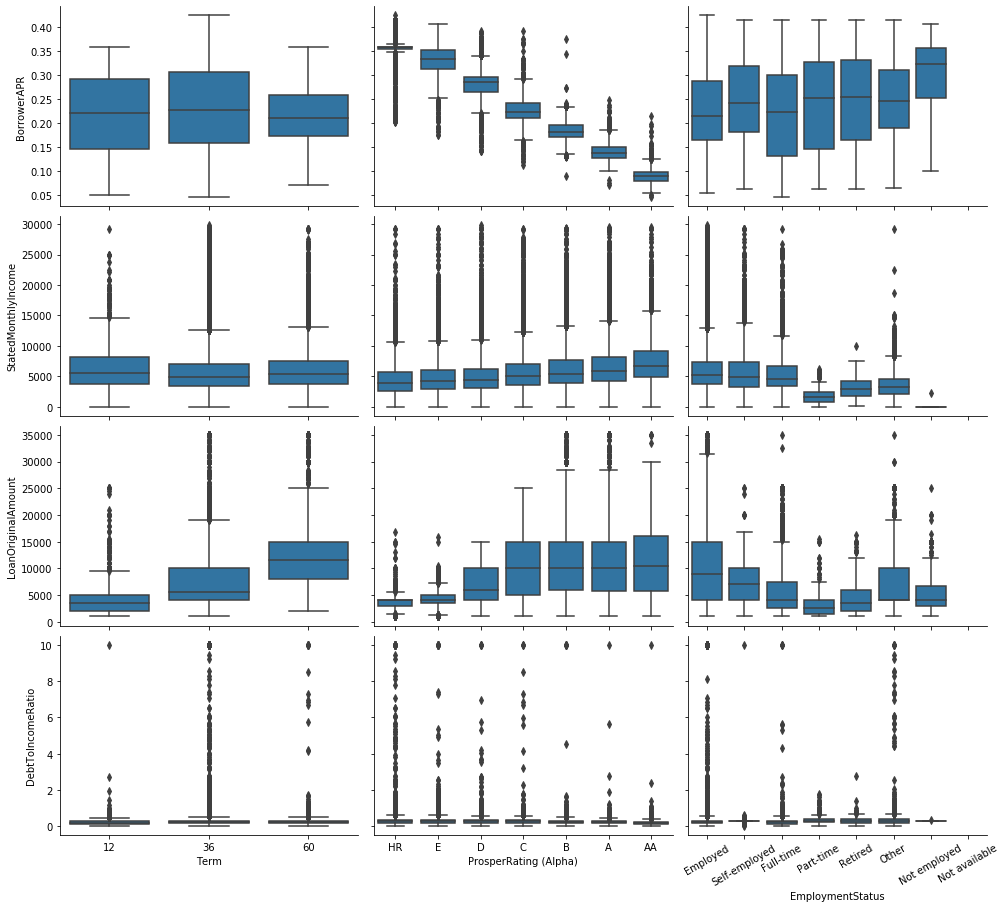

In [34]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

Finally, let's look at relationships between the four categorical features.

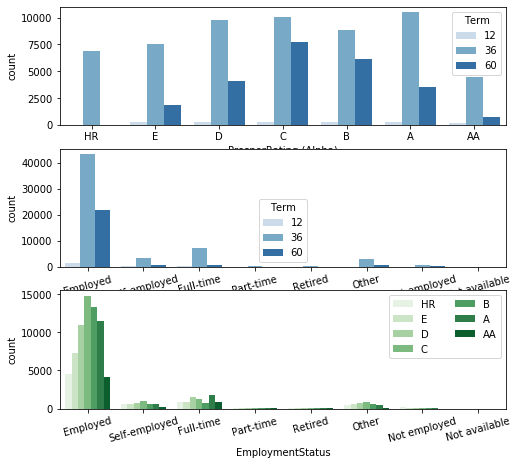

In [35]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(4, 1, 1)
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)


# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);


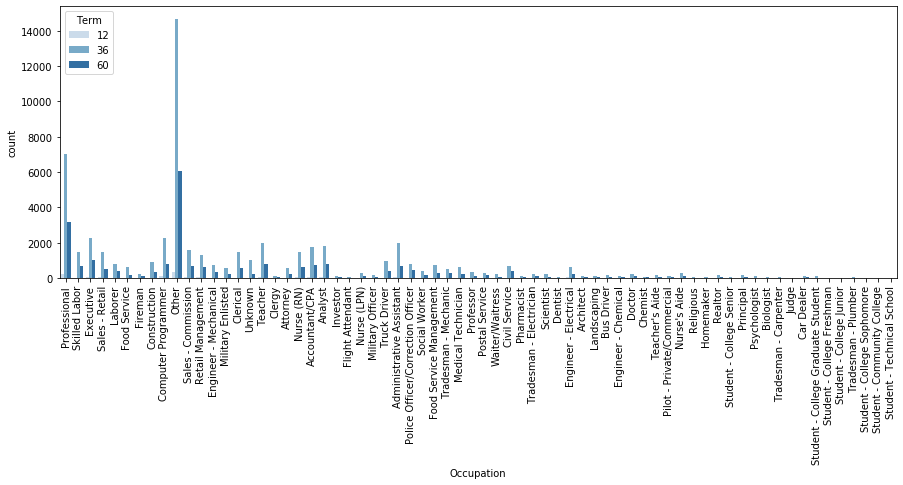

In [36]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sb.countplot(data = df_loan, x = 'Occupation', hue = 'Term', palette = 'Blues');
plt.xticks(rotation=90);

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers. 

With the preliminary look at bivariate relationships out of the way, I want to see how borrower APR and loan original amount are related to one another for all of the data.

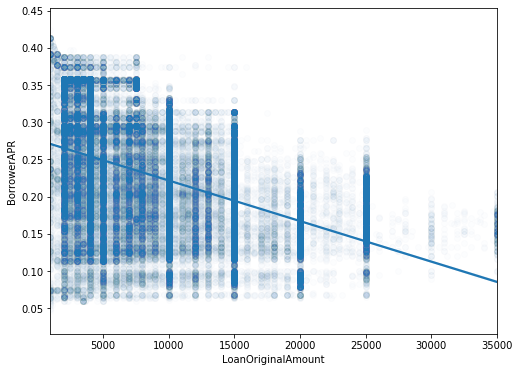

In [37]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount. 

### How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount.

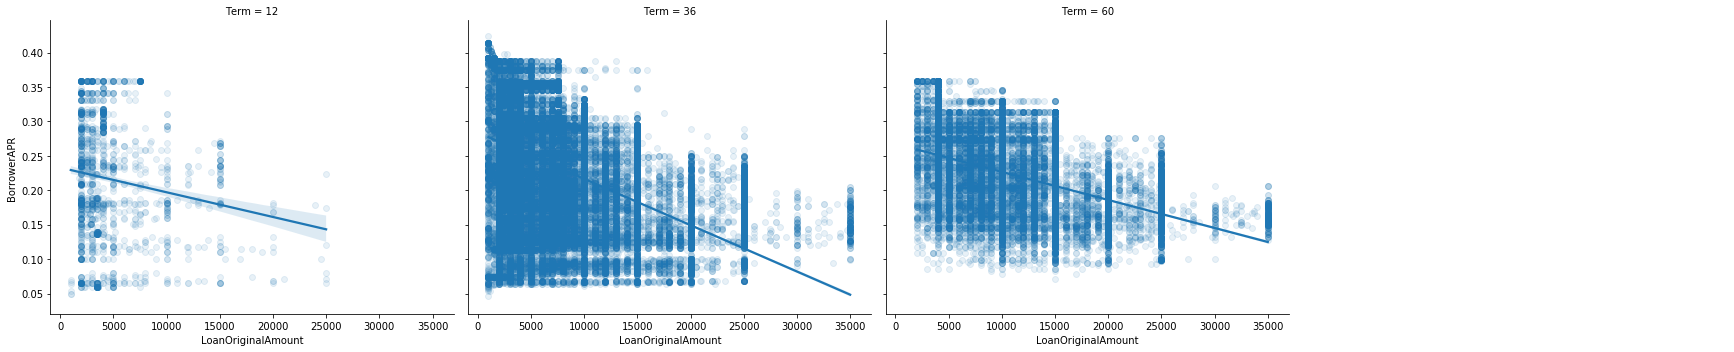

In [38]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= df_loan, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term doesn't seem to have effect on relationship of APR and loan amount

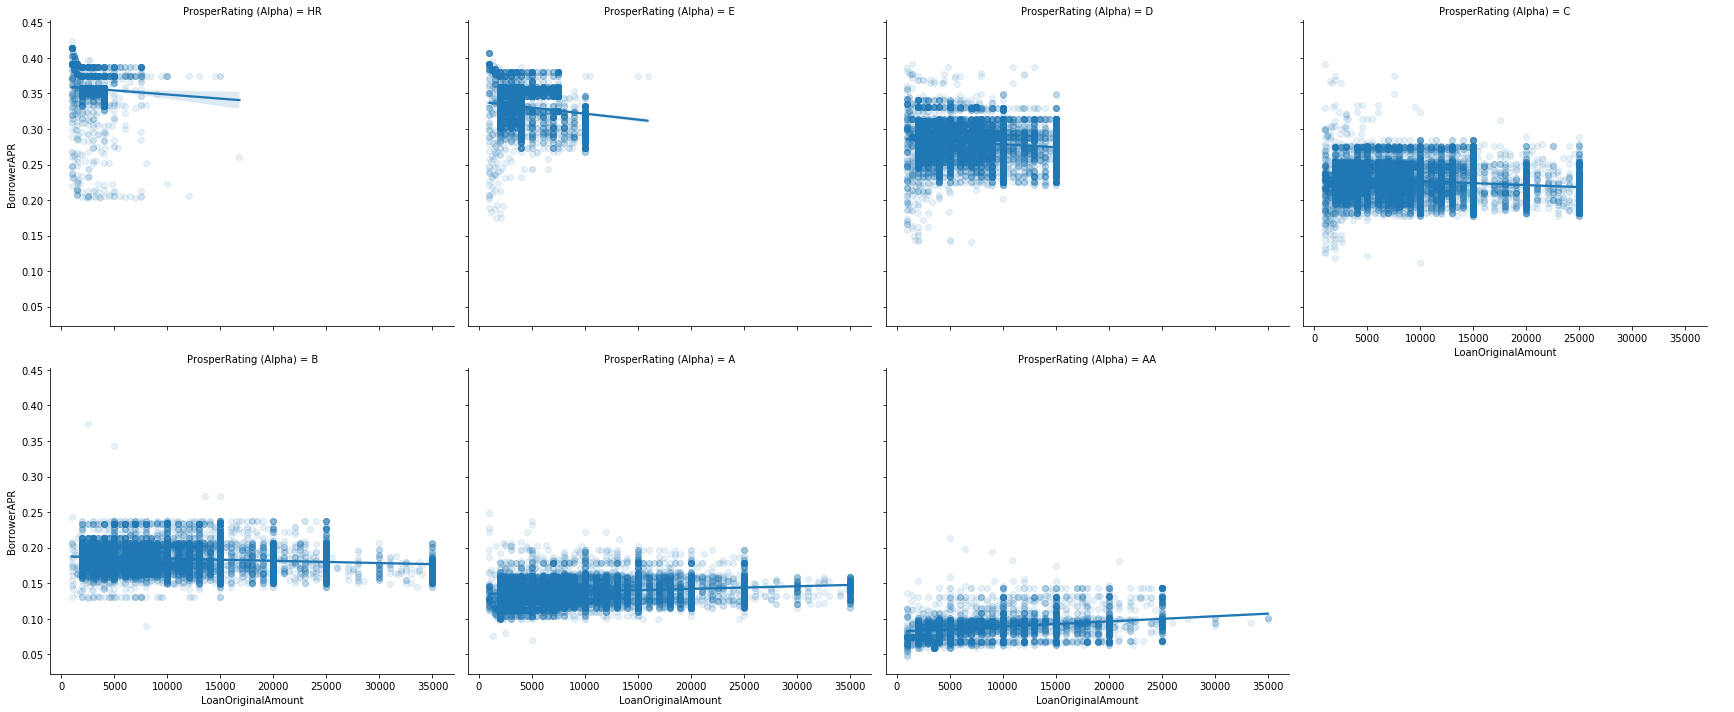

In [39]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

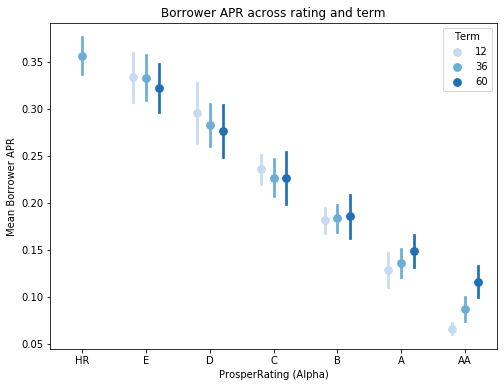

In [40]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

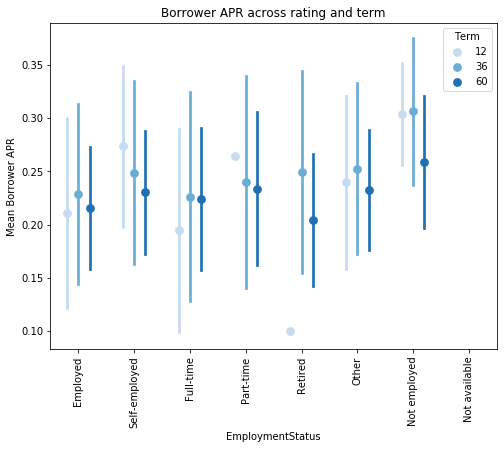

In [41]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

Then, look at the rating and term effects on stated monthly income and loan original amount variables

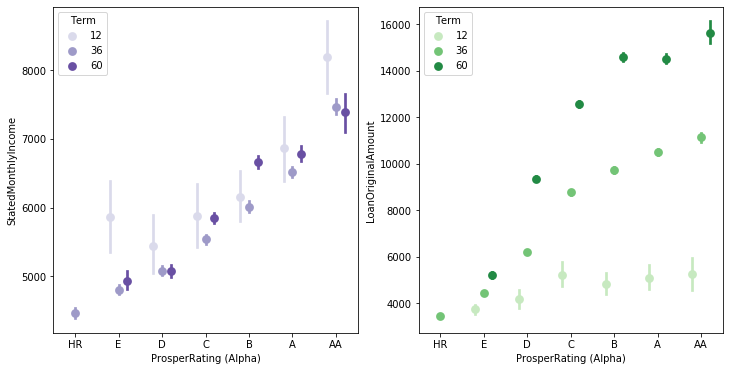

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger. 

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.

In [43]:
# save the cleaned dataset for explanatory data analysis
df_loan.to_csv('LoanData_cleaned.csv')